# Filtering, Corners and Edges

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `C:\Users\lenono\Documents\StudyCode\JuliaCon23_ImageProcessingWorkshop`


# Introduction
JuliaImages provides various filtering operations, corner algorithms and edge detection algorithms through various packages in the ecosystem. Images has good support for filtering, corner and edge detection. 

In [4]:
using Images, TestImages

Images.jl provides the support for filtering operations through ImageFiltering.jl. ImageFiltering supports linear and nonlinear filtering operations on arrays, with an emphasis on the kinds of operations used in image processing. ImageFiltering.jl provides:

| Function                 | Action         | 
|:-------------------------|:---------------|
|[`imfilter`] & [`imfilter!`]       | Filter a one, two or multidimensional array img with a kernel by computing their correlation |
|[`mapwindow`] & [`mapwindow!`]      | Apply a function to sliding windows of img  |
|[`imgradients`](@ref)     | Estimate the gradient of img in the direction of the first and second dimension at all points of the image, using a kernel|
|[`padarray`](@ref)        | Generate a padded image from an array img and a specification border |
|[`kernelfactors`](@ref)   | Prepare a factored kernel for filtering. |
|[`findlocalminima`](@ref) | Returns the coordinates of elements whose value is smaller than all of their immediate neighbors |
|[`findlocalmaxima`](@ref) | Returns the coordinates of elements whose value is larger than all of their immediate neighbors |

Common kernels (filters) are organized in the `Kernel` and `KernelFactors` modules and imgradients is quite a useful function for gradient calculation in image.

Let's have a sample image to use:

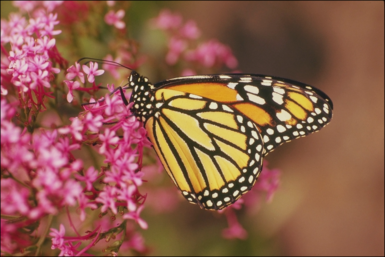

In [16]:
img = restrict(testimage("monarch"),(1,2)) # rescale 0.5 in both directions

Let's apply gaussian and laplacian filtering on the image. To make a blurred version of the image, we can use a Gaussian filter kernel, using the Kernel.gaussian() function. A value of 3 is quite blurry:

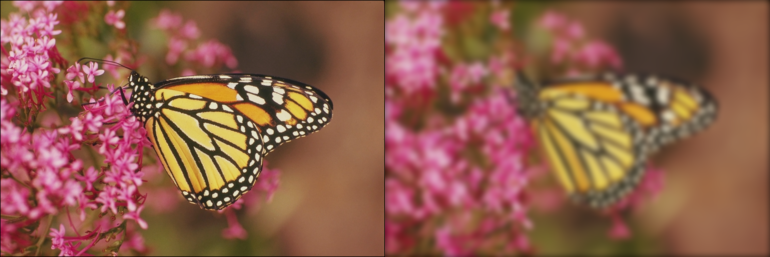

In [17]:
imgg = imfilter(img, Kernel.gaussian(3));

mosaicview(img, imgg;nrow=1)

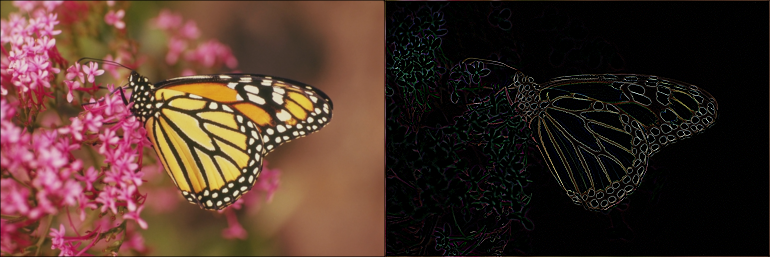

In [19]:
imgl = imfilter(img, Kernel.Laplacian());

mosaicview(img, imgl;nrow=1)

It's also possible to use an array as a kernel. This 3 × 3 array in k is a good example of a sharpening filter: the central pixel will be boosted.

In [20]:
k = [0 -1 0 ; -1 5.5 -1 ; 0 -1 0]

3×3 Matrix{Float64}:
  0.0  -1.0   0.0
 -1.0   5.5  -1.0
  0.0  -1.0   0.0

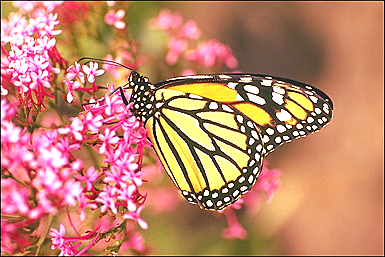

In [21]:
img3 = imfilter(img, k)

# Applying a function to each pixel
The mapwindow() function provides a way to slide a rectangular "window" over every pixel, and apply a function to that pixel using the surrounding pixel values. The window can be m pixels across and n pixels down; m and n must both be odd.

By default every pixel is visited.

This example uses a 13 × 13 window, and randomly selects just one of the 169 pixels in that window as the new value for the pixel.

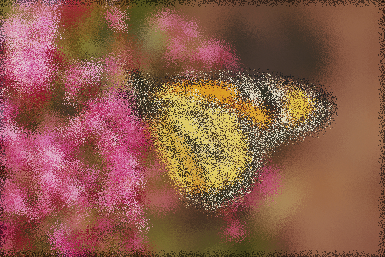

In [23]:
mapwindow(b -> b[rand(1:end)], img, (13, 13))

The result is like a dithered/downsampled version of the image.

In the next example, this short function is used to convert the buffer to gray values, find the lowest (minimum) value of the windowed area, then select the colored pixel at that point. The resulting image is thus a darker and less detailed version of the original.

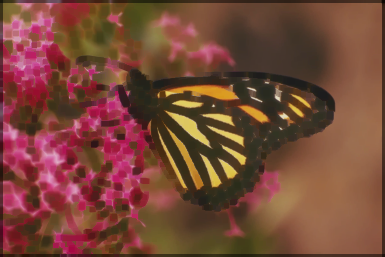

In [26]:
function minimum_color(buff::T) where T <: Array
    gbuff = Gray.(buff)
    k = argmin(gbuff)
    return buff[k]
end

mapwindow(minimum_color, img, (5, 5))